In [120]:
import cmath
import math
import sympy
import matplotlib.pyplot as plt
from fractions import Fraction

r, e, i, t, p = sympy.symbols('r e i theta pi')

z_power = 5 # <-- Change values here
complex_number = complex(1, sympy.sqrt(3)) # <--

def get_polar_roots(power, num):
    x = sympy.sqrt(round(num.real**2)) # Required to get num back in root form if applicable
    y = sympy.sqrt(round(num.imag**2))
    magnitude = sympy.sqrt(x**2 + y**2)
    argument = sympy.atan2(y, x)
    complex_roots = []

    for k in range(0, power):
        complex_roots.append(r**(Fraction(1, power))*(e**((t+2*k*p)*i/power)))

    return complex_roots, magnitude, argument

polar_roots = get_polar_roots(z_power, complex_number) # <-- Change values here
roots, mag, arg = polar_roots[0], polar_roots[1], polar_roots[2]

sympy.init_printing(use_latex='mathjax')
sympy.Eq(r, mag), sympy.Eq(t, arg), roots

⎛              ⎡ i⋅θ         i⋅(2⋅π + θ)         i⋅(4⋅π + θ)         i⋅(6⋅π + 
⎜              ⎢ ───         ───────────         ───────────         ─────────
⎜           π  ⎢  5  5 ___        5      5 ___        5      5 ___        5   
⎜r = 2, θ = ─, ⎣e   ⋅╲╱ r , e           ⋅╲╱ r , e           ⋅╲╱ r , e         
⎝           3                                                                 

θ)         i⋅(8⋅π + θ)      ⎤⎞
──         ───────────      ⎥⎟
   5 ___        5      5 ___⎥⎟
  ⋅╲╱ r , e           ⋅╲╱ r ⎦⎟
                             ⎠

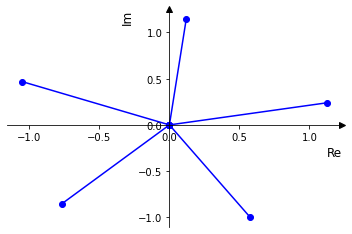

In [117]:
# Done
def complex_cartesian_roots(power, num):
    x = num.real
    y = num.imag
    magnitude = abs(num)
    argument = math.atan2(y, x)

    root_mag = magnitude**(1/power)
    root_args = [(argument + 2*math.pi*k) / power for k in range(0, power)]

    return [root_mag*(math.cos(root) + math.sin(root)*1j) for root in root_args]

def root_plotter(list_of_roots):
    ax = plt.gca() # Create axis
    ax.spines['left'].set_position('zero') # Centre axis
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.ylabel('Im', loc='top', fontsize=12) # Label axis
    plt.xlabel('Re', loc='right', fontsize=12)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) # Add arrows to axis
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    for root in list_of_roots:
        ax.plot([0,root.real], [0,root.imag], 'bo-')

root_plotter(complex_cartesian_roots(z_power, complex_number))
